In [5]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## EDA - Univariate

In [7]:
# load in cleaned dataset
df_air = pd.read_csv('capstone_data_cleaned.csv')
df_air.head()

DATE  DEPARTURES_PERFORMED  SEATS  PASSENGERS UNIQUE_CARRIER  \
0  2013-01-01                   1.0   54.0         0.0             DL   
1  2013-11-01                   1.0   54.0        24.0             DL   
2  2013-05-01                   1.0   54.0        28.0             DL   
3  2013-02-01                   1.0   54.0        30.0             DL   
4  2013-11-01                   1.0   54.0        30.0             DL   

           CARRIER_NAME  ORIGIN_AIRPORT_ID            ORIGIN_CITY_NAME  \
0  Delta Air Lines Inc.              13232                 Chicago, IL   
1  Delta Air Lines Inc.              12197            White Plains, NY   
2  Delta Air Lines Inc.              11618                  Newark, NJ   
3  Delta Air Lines Inc.              12197            White Plains, NY   
4  Delta Air Lines Inc.              13289  Marsh Harbour, The Bahamas   

  ORIGIN_COUNTRY_NAME  DEST_AIRPORT_ID              DEST_CITY_NAME  \
0       United States            15147   Treasure Cay, The Bahamas   
1       United States            13289  Marsh Harbour, The Bahamas   
2       United States            13289  Marsh Harbour, The Bahamas   
3       United States            13289  Marsh Harbour, The Bahamas   
4         The Bahamas            11618                  Newark, NJ   

  DEST_COUNTRY_NAME CLASS  CAPACITY  
0       The Bahamas     L  0.000000  
1       The Bahamas     L  0.444444  
2       The Bahamas     L  0.518519  
3       The Bahamas     L  0.555556  
4     United States     L  0.555556

In [8]:
df_uni=df_air.copy()

In [9]:
# categorical variables
cat_cols = ['DATE', 'UNIQUE_CARRIER', 'CARRIER_NAME', 'ORIGIN_CITY_NAME','ORIGIN_COUNTRY_NAME', 'DEST_CITY_NAME', 'DEST_COUNTRY_NAME', 'CLASS', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']

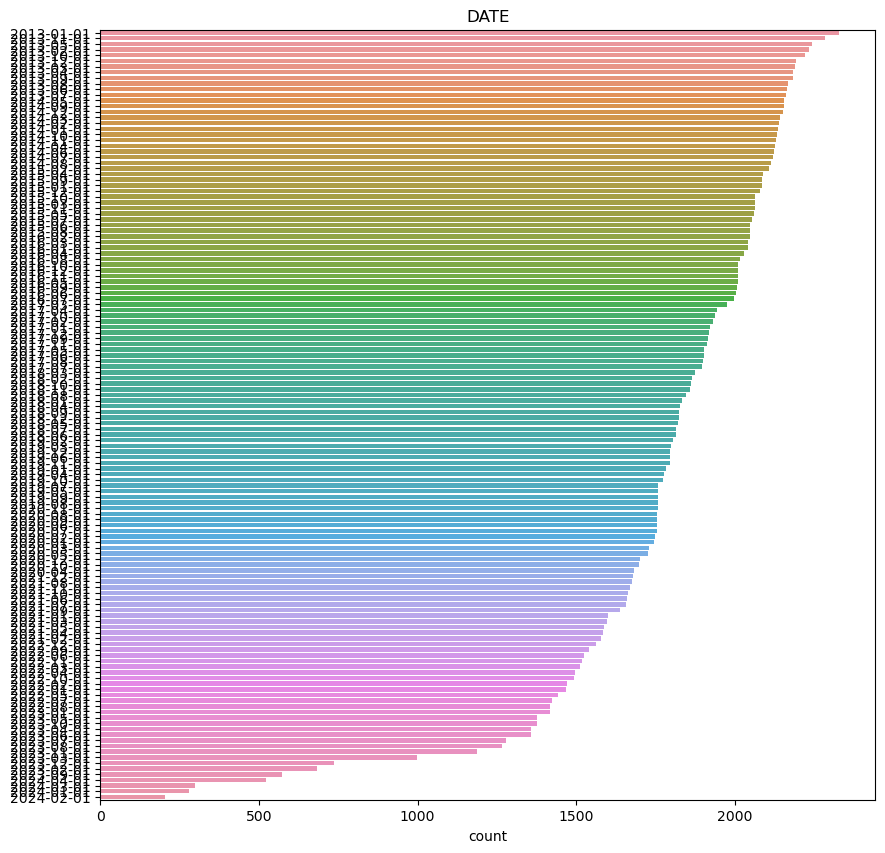

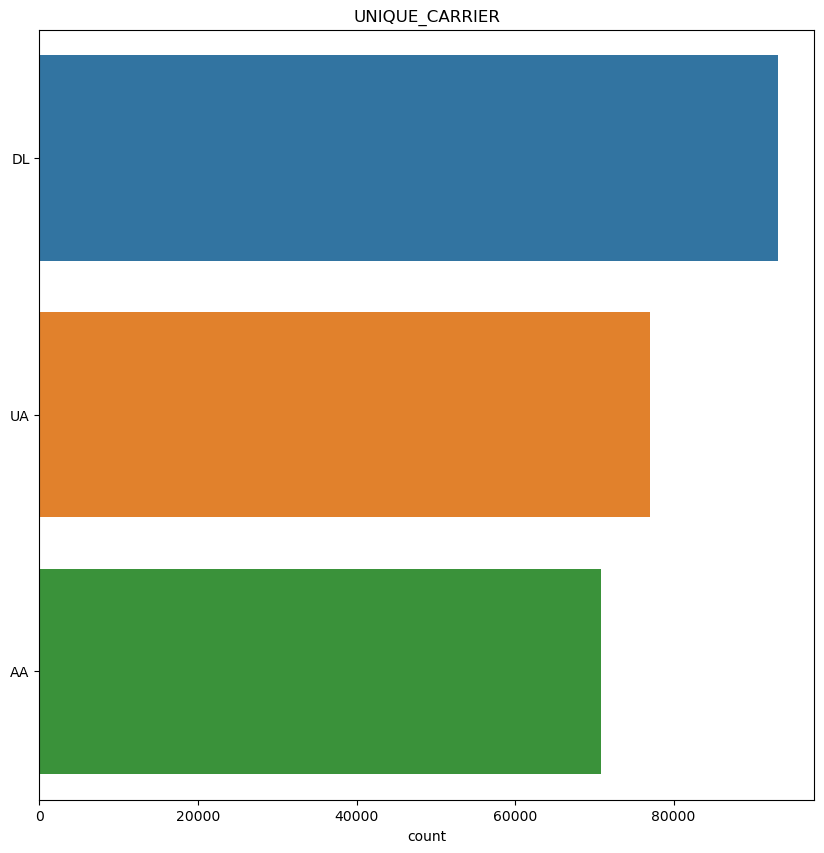

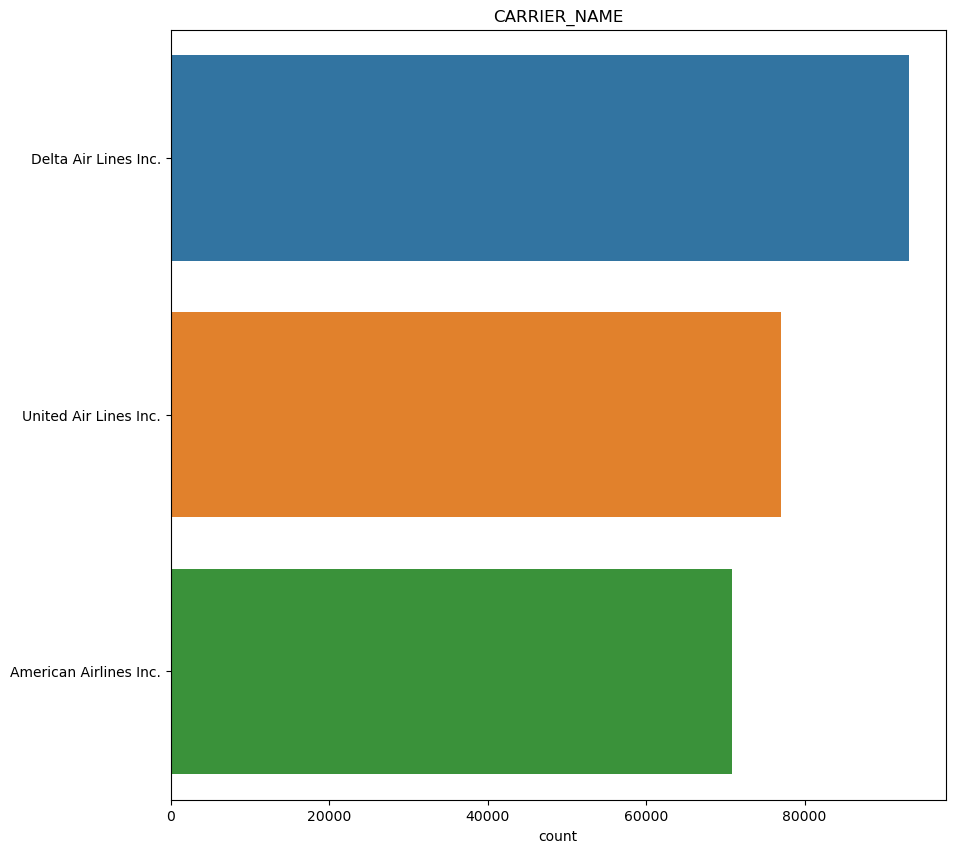

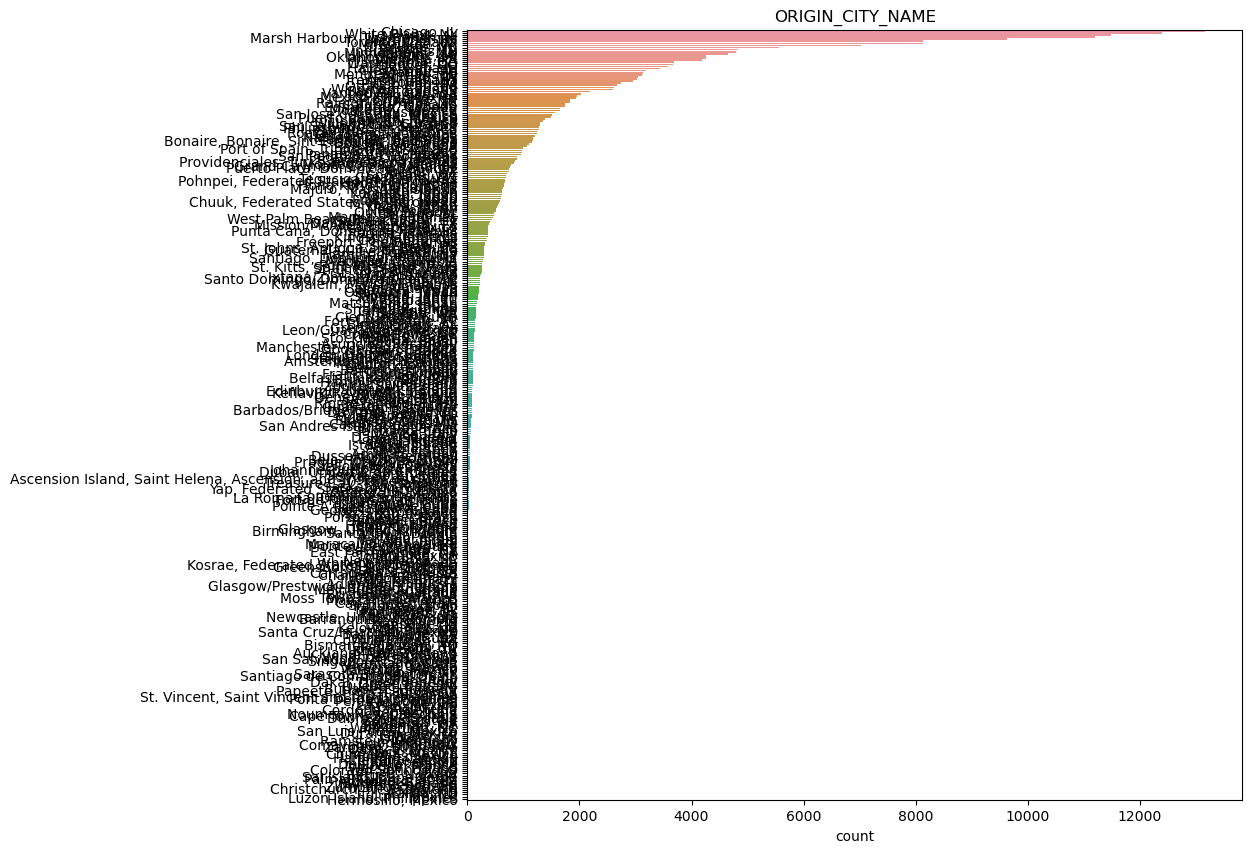

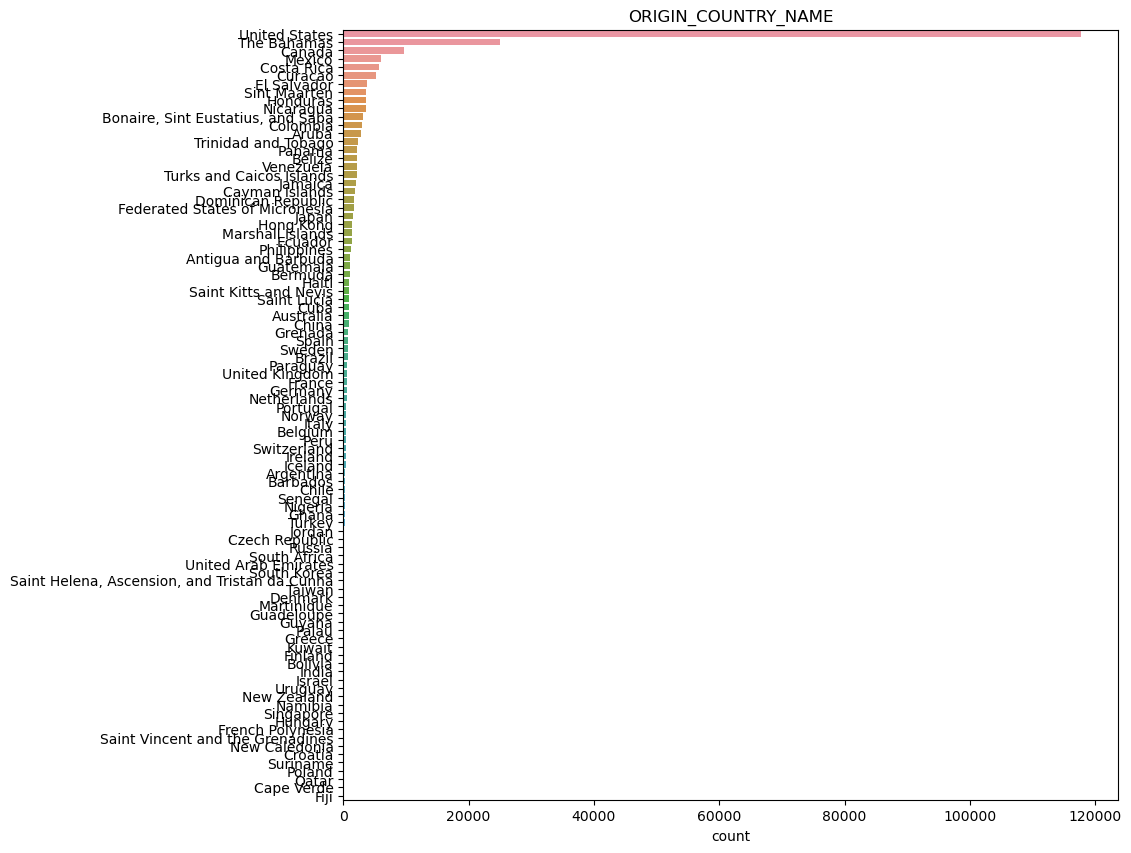

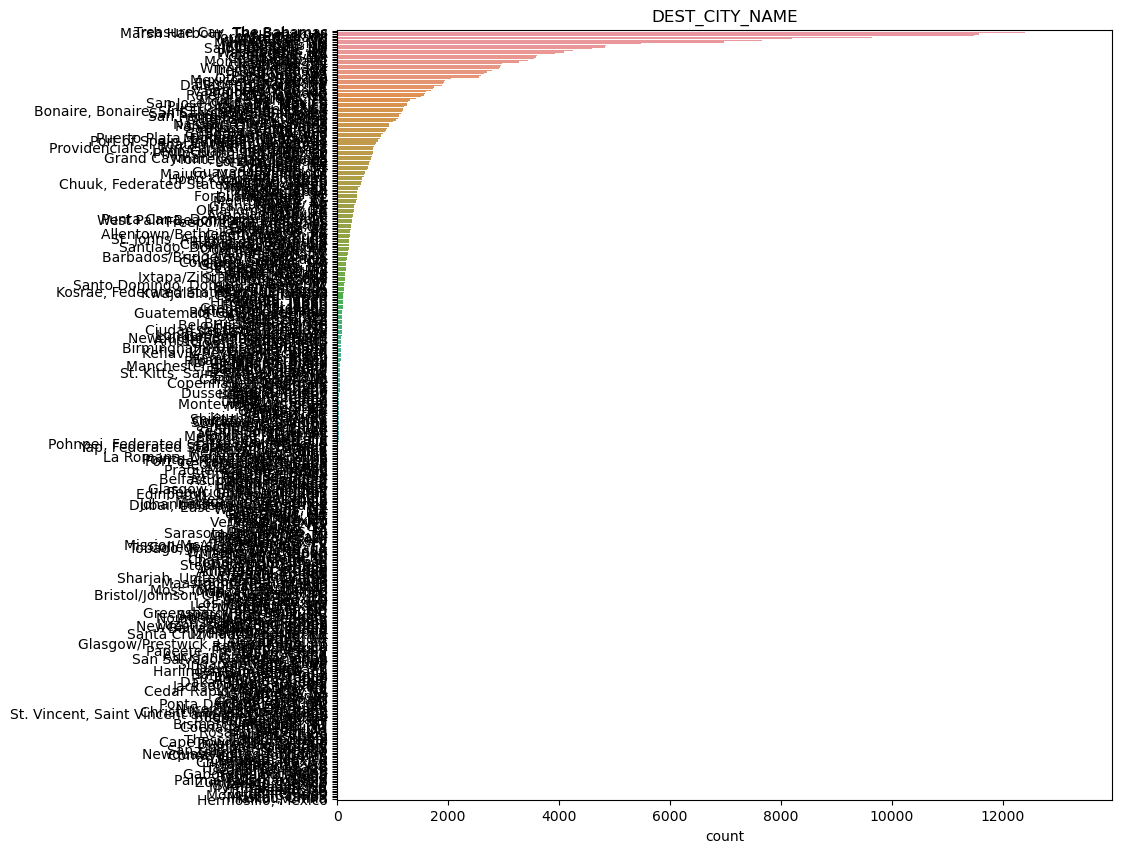

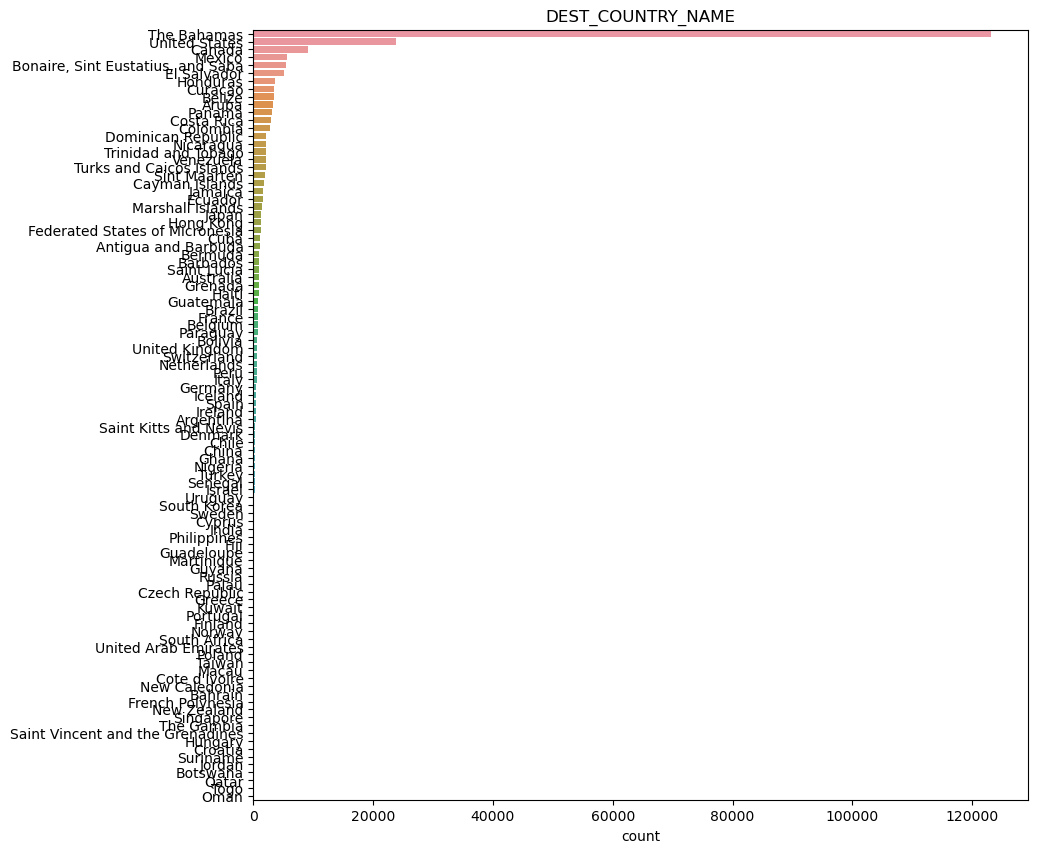

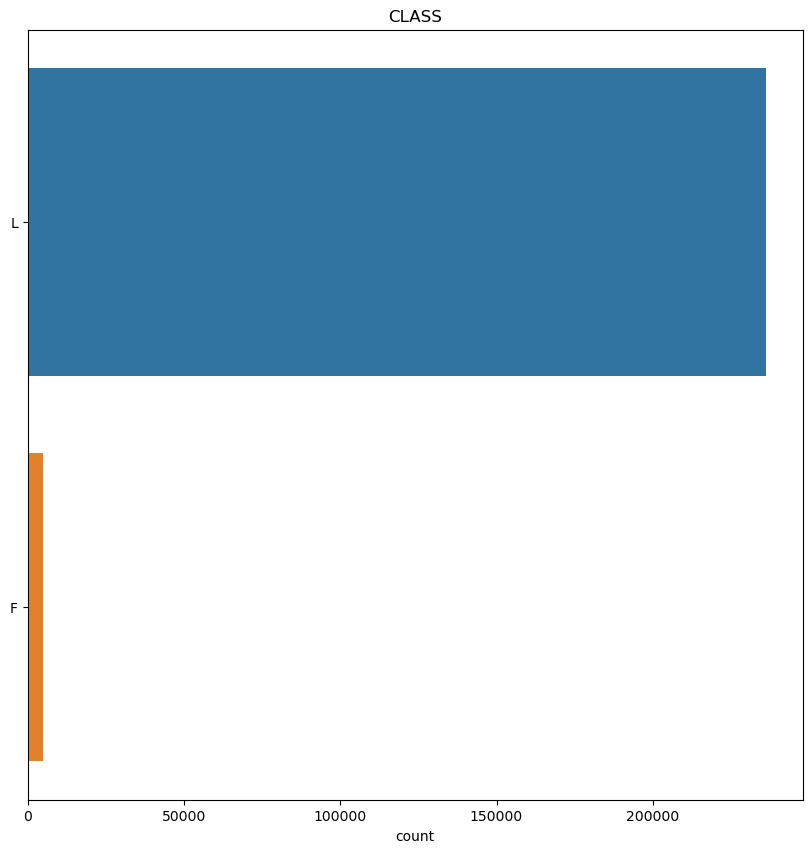

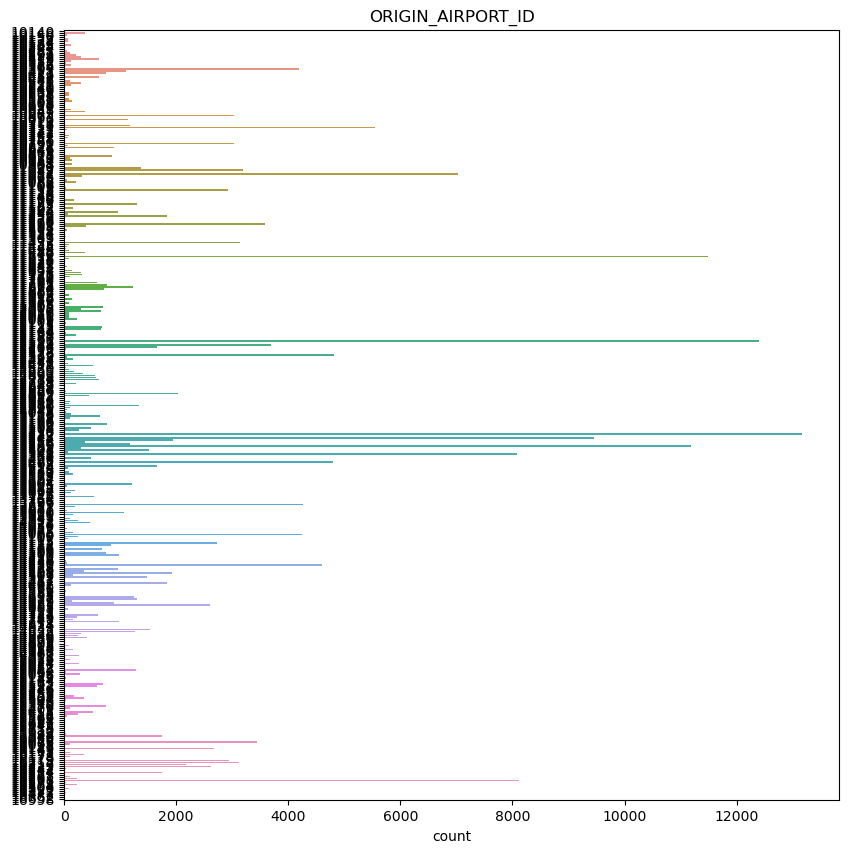

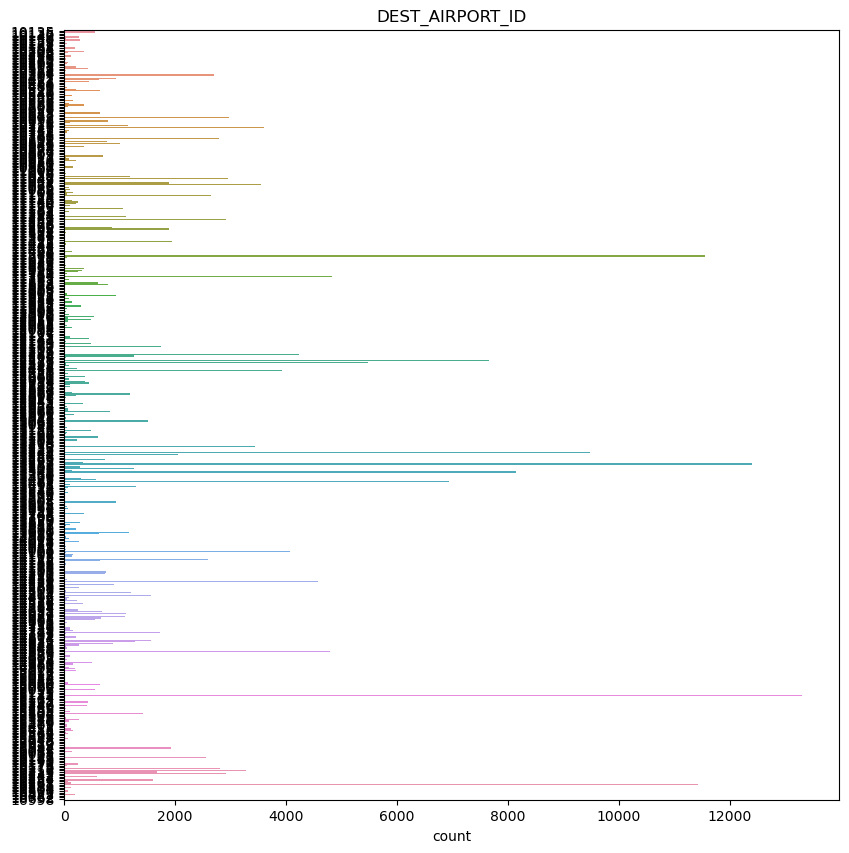

In [10]:
# plot the categorical variables
for col in cat_cols:
    plt.figure(figsize=(10,10))
    sns.barplot(data=df_uni, 
                y=df_uni[col].unique(), 
                x=df_uni[col].value_counts(), 
                orient='h')
    plt.title(f'{col}')
    plt.show()

In [11]:
# numerical variables
num_cols = ['DEPARTURES_PERFORMED', 'SEATS', 'PASSENGERS', 'CAPACITY']

C:\Users\Joe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Joe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Joe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Joe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

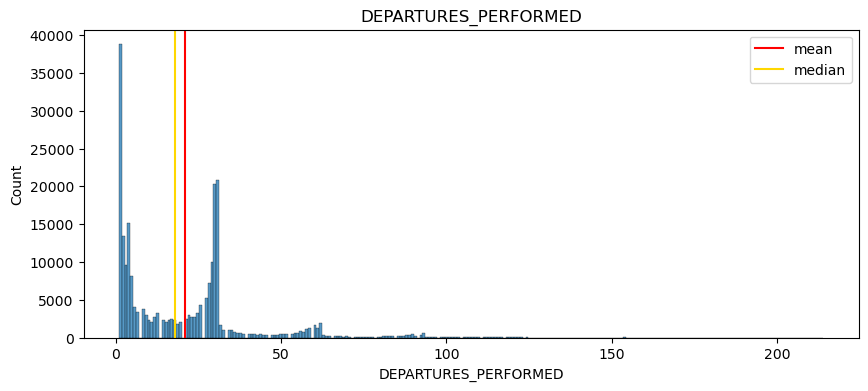

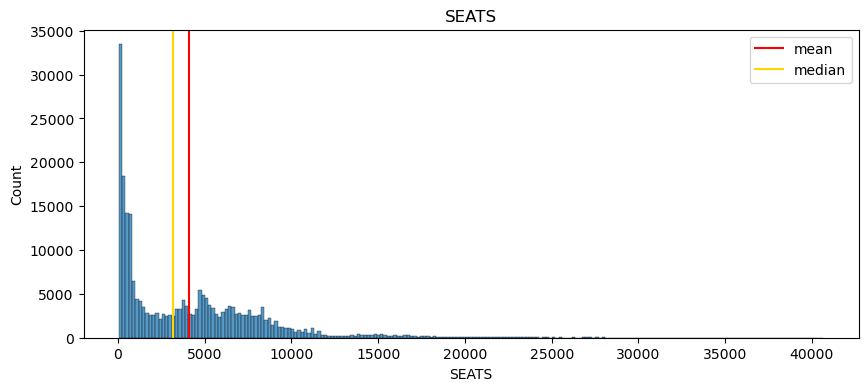

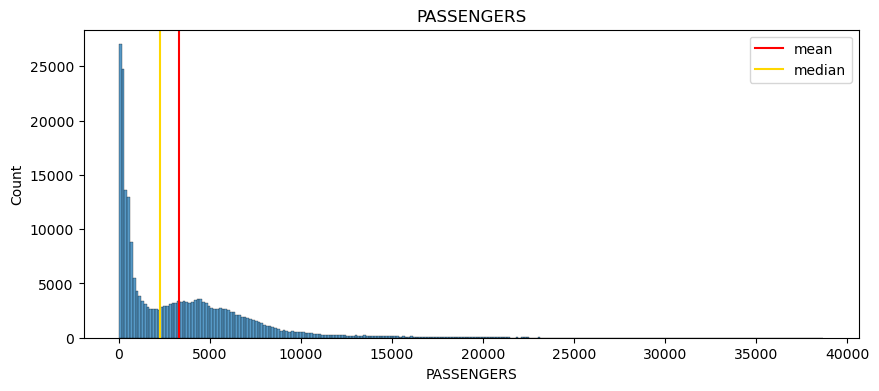

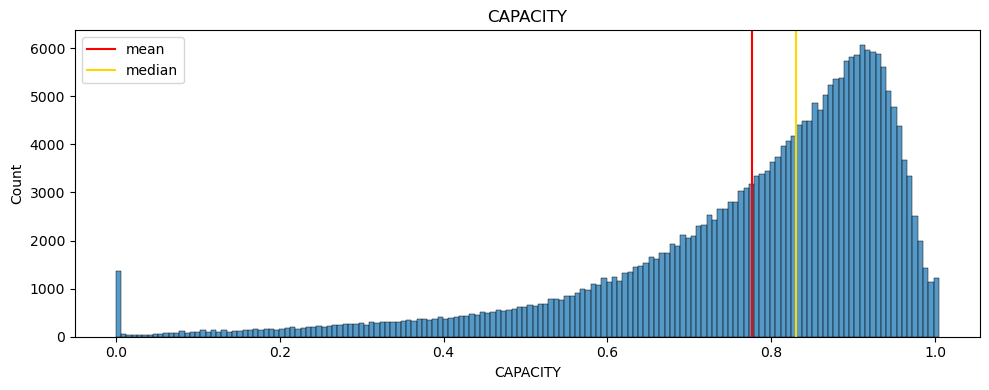

In [12]:
# plot the numerical variables
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df_uni, x=col)
    plt.title(f'{col}')
    plt.axvline(df_uni[col].mean(), c='red', label='mean')
    plt.axvline(df_uni[col].median(), c='gold', label='median')
    plt.legend()

plt.tight_layout()
plt.show()

## EDA - Multivariate

In [14]:
df_multi = df_air.copy()
df_multi.columns

Index(['DATE', 'DEPARTURES_PERFORMED', 'SEATS', 'PASSENGERS', 'UNIQUE_CARRIER',
       'CARRIER_NAME', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME',
       'ORIGIN_COUNTRY_NAME', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME',
       'DEST_COUNTRY_NAME', 'CLASS', 'CAPACITY'],
      dtype='object')

In [69]:
cap = df_air[df_air['DEPARTURES_PERFORMED']>100].sort_values(by=['CAPACITY'], ascending=False)
cap.reset_index(drop=True, inplace=True)
cap.head(10)

DATE  DEPARTURES_PERFORMED    SEATS  PASSENGERS UNIQUE_CARRIER  \
0  2021-08-01                 111.0  19092.0     18666.0             AA   
1  2021-09-01                 103.0  17716.0     17275.0             AA   
2  2017-03-01                 110.0  19630.0     19068.0             UA   
3  2017-03-01                 109.0  19463.0     18881.0             UA   
4  2013-07-01                 122.0  18290.0     17729.0             AA   
5  2024-03-01                 151.0  28690.0     27787.0             AA   
6  2015-08-01                 186.0  29740.0     28798.0             AA   
7  2016-06-01                 118.0  21358.0     20665.0             AA   
8  2024-03-01                 116.0  19952.0     19300.0             AA   
9  2022-03-01                 101.0  18079.0     17482.0             UA   

             CARRIER_NAME  ORIGIN_AIRPORT_ID  \
0  American Airlines Inc.              14739   
1  American Airlines Inc.              14739   
2   United Air Lines Inc.              13930   
3   United Air Lines Inc.              11032   
4  American Airlines Inc.              12693   
5  American Airlines Inc.              11032   
6  American Airlines Inc.              11032   
7  American Airlines Inc.              11298   
8  American Airlines Inc.              14838   
9   United Air Lines Inc.              11032   

                    ORIGIN_CITY_NAME ORIGIN_COUNTRY_NAME  DEST_AIRPORT_ID  \
0  Santo Domingo, Dominican Republic  Dominican Republic            13303   
1  Santo Domingo, Dominican Republic  Dominican Republic            13303   
2                        Chicago, IL       United States            11032   
3                     Cancun, Mexico              Mexico            13930   
4                  Kingston, Jamaica             Jamaica            13303   
5                     Cancun, Mexico              Mexico            11057   
6                     Cancun, Mexico              Mexico            11298   
7              Dallas/Fort Worth, TX       United States            11032   
8               San Jose, Costa Rica          Costa Rica            13303   
9                     Cancun, Mexico              Mexico            13930   

          DEST_CITY_NAME DEST_COUNTRY_NAME CLASS  CAPACITY  
0              Miami, FL     United States     F  0.977687  
1              Miami, FL     United States     F  0.975107  
2         Cancun, Mexico            Mexico     F  0.971370  
3            Chicago, IL     United States     F  0.970097  
4              Miami, FL     United States     F  0.969328  
5          Charlotte, NC     United States     F  0.968526  
6  Dallas/Fort Worth, TX     United States     F  0.968325  
7         Cancun, Mexico            Mexico     F  0.967553  
8              Miami, FL     United States     F  0.967322  
9            Chicago, IL     United States     F  0.966978

In [98]:
cap1 = cap.groupby(['DEST_CITY_NAME','CARRIER_NAME'])['CAPACITY'].mean()
cap1

DEST_CITY_NAME                     CARRIER_NAME          
Atlanta, GA                        Delta Air Lines Inc.      0.833932
Cancun, Mexico                     American Airlines Inc.    0.827952
                                   Delta Air Lines Inc.      0.822905
                                   United Air Lines Inc.     0.848731
Caracas, Venezuela                 American Airlines Inc.    0.794225
Charlotte, NC                      American Airlines Inc.    0.836980
Chicago, IL                        American Airlines Inc.    0.758875
                                   United Air Lines Inc.     0.932455
Dallas/Fort Worth, TX              American Airlines Inc.    0.789567
Denver, CO                         United Air Lines Inc.     0.871485
Guam, TT                           Delta Air Lines Inc.      0.870900
                                   United Air Lines Inc.     0.649618
Guatemala City, Guatemala          American Airlines Inc.    0.894126
                                

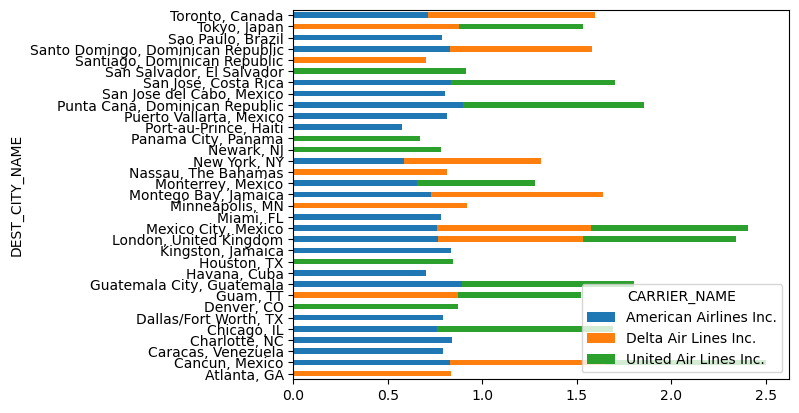

In [102]:
cap1.unstack().plot.barh(stacked=True)
plt.show()

In [36]:
X = df_air.drop(columns=['PASSENGERS'])
y = df_air['PASSENGERS']

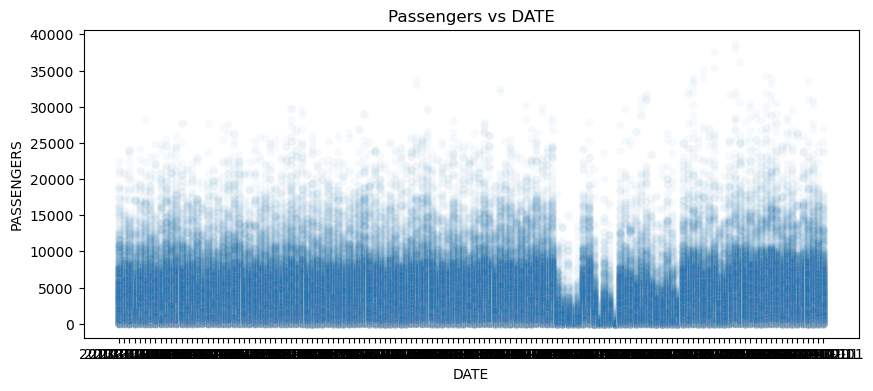

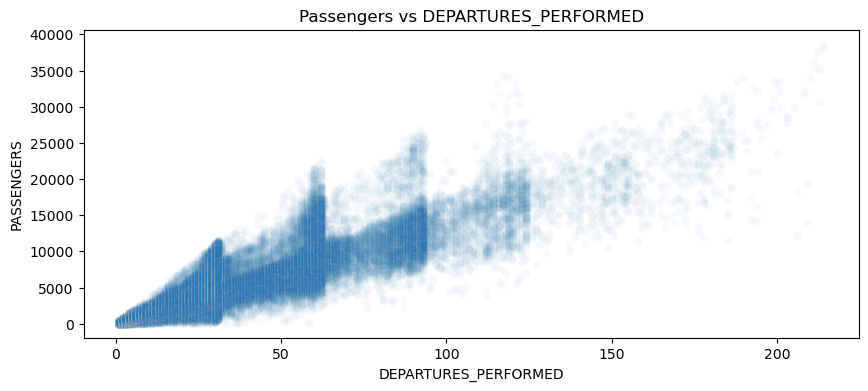

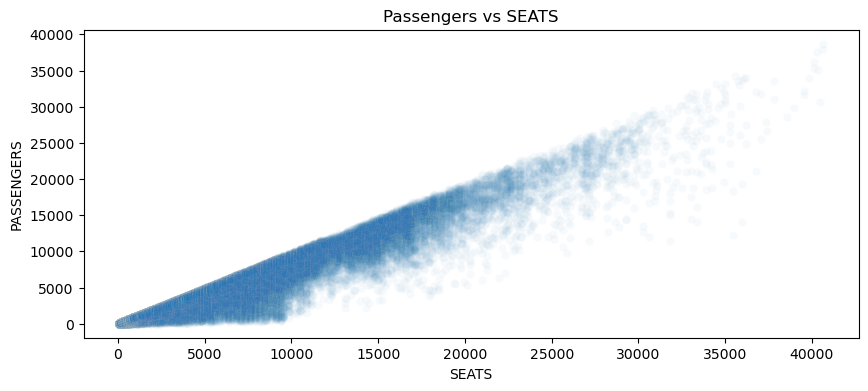

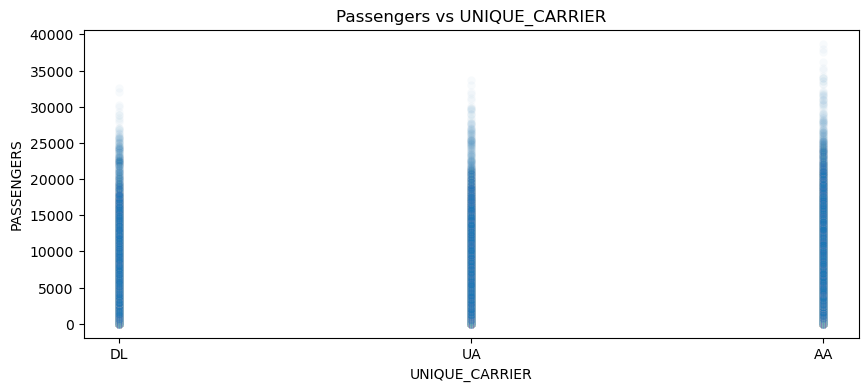

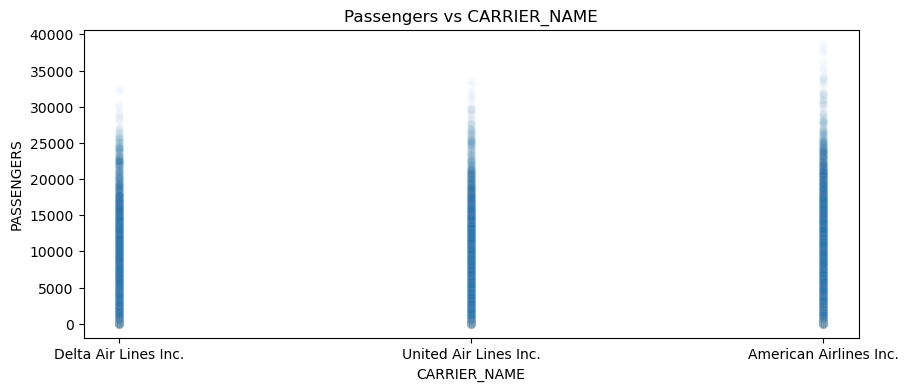

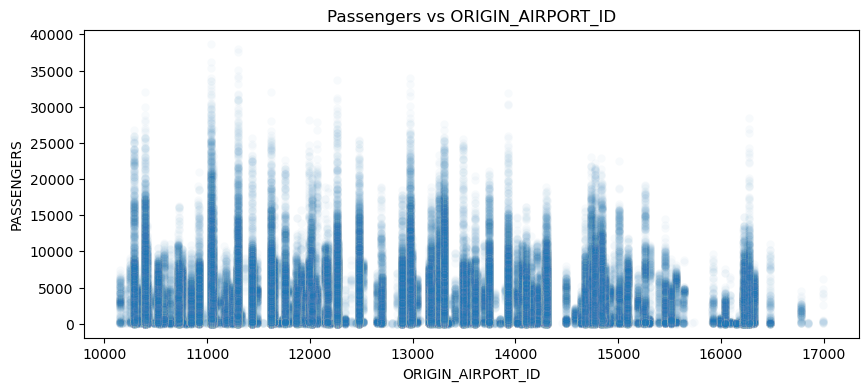

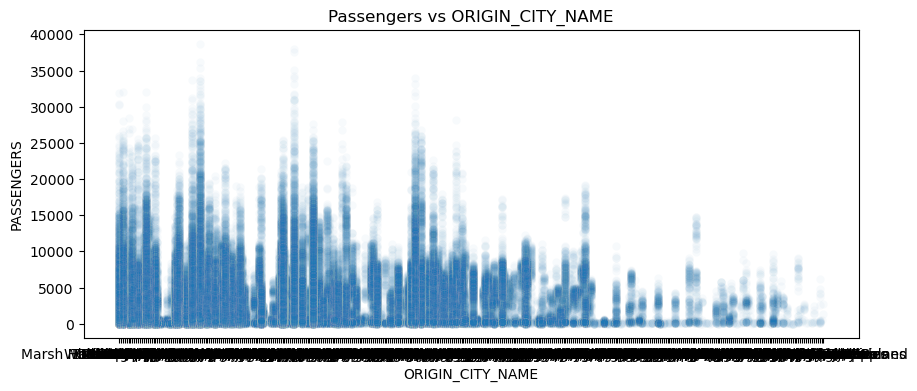

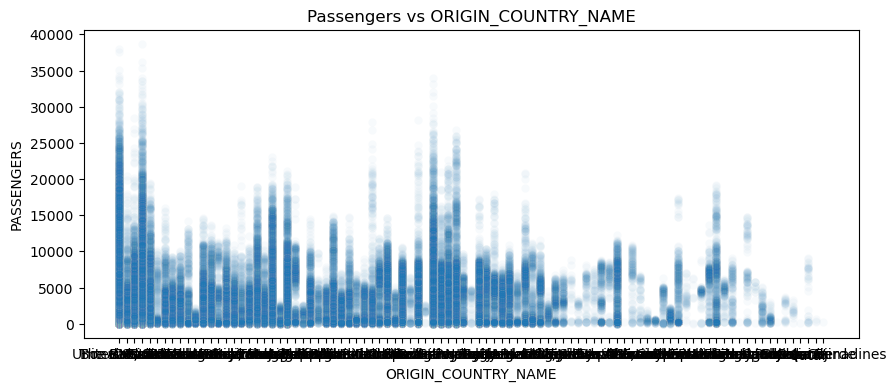

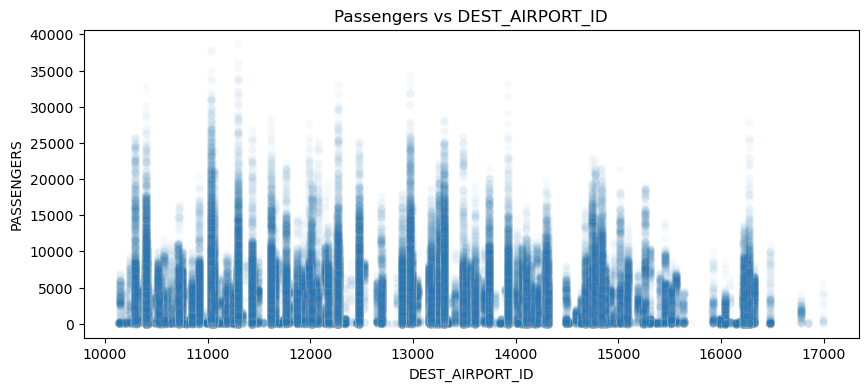

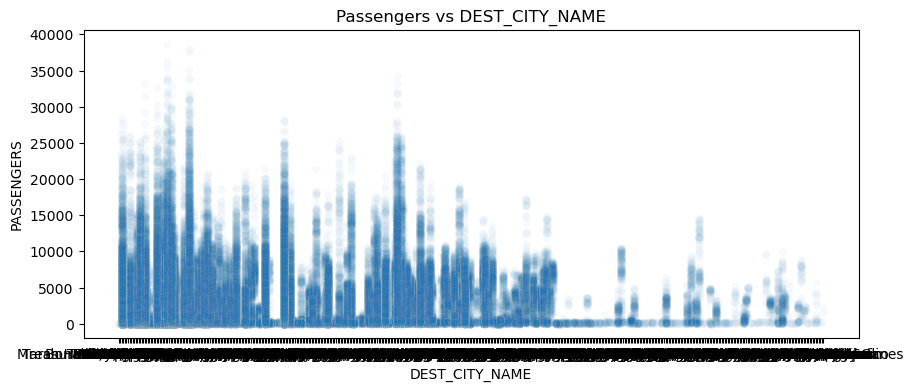

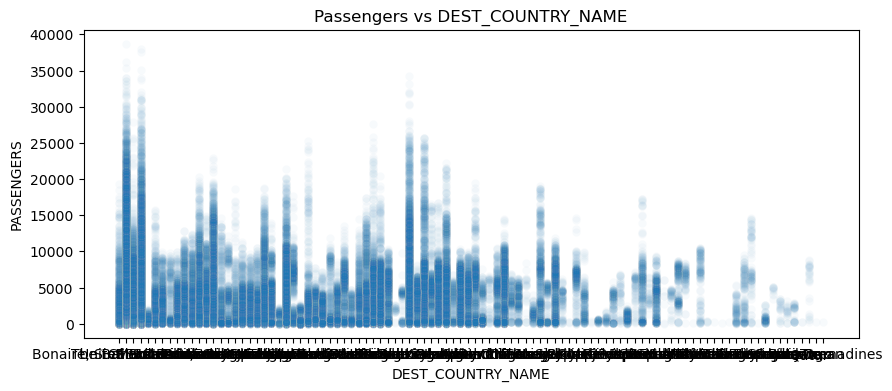

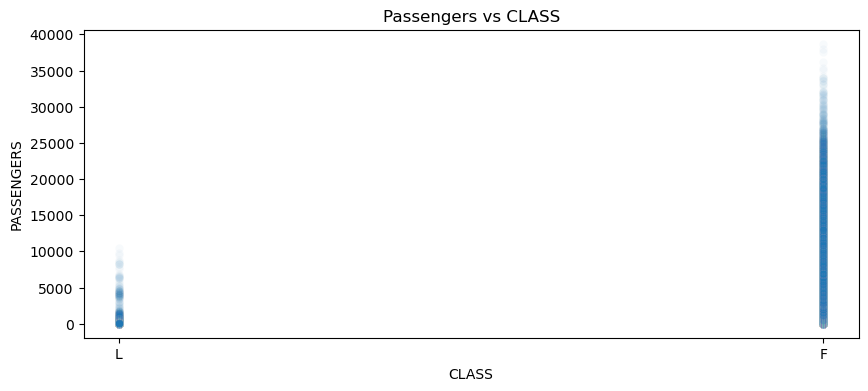

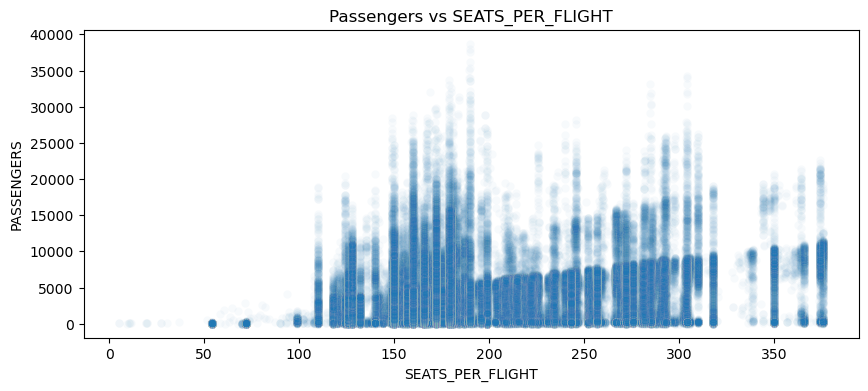

In [38]:
for col in X.columns:
    plt.figure(figsize=(10,4))
    sns.scatterplot(df_air, x=col, y=y, alpha=0.03)
    plt.title(f'Passengers vs {col}')

plt.show()